# Lab: Titanic EDA

This week will have a Pandas, EDA, and data visualization focus. At this point in the course, you should be chomping at the bit to get your hands dirty on a real-world dataset.

For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Step 1: Reading the data

1. Go to [Kaggle Titanic Data](https://www.kaggle.com/c/titanic/data])
2. Click Data on the Menu and you'll be brought to a page with a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the data is structured and what the data represents.
3. Read the titanic data (in the form of the `train.csv` in this repo using the appropriate Pandas method).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("train.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
print(titanic.index.name)

None


## Step 2: Cleaning the data
####  1. Create a bar chart showing how many missing values are in each column

<AxesSubplot:>

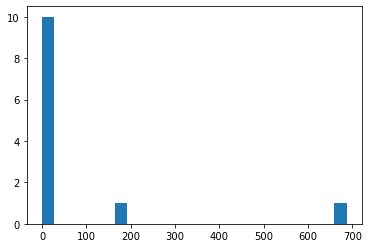

In [6]:
titanic.isnull().sum().hist(grid=False,bins=25)

<AxesSubplot:>

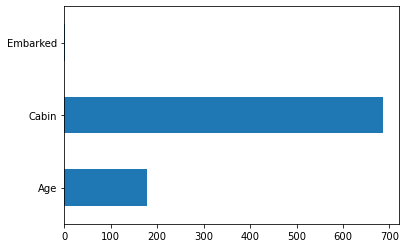

In [7]:
titanic.isnull().sum()[titanic.isnull().sum() != 0].plot(kind='barh')

<AxesSubplot:>

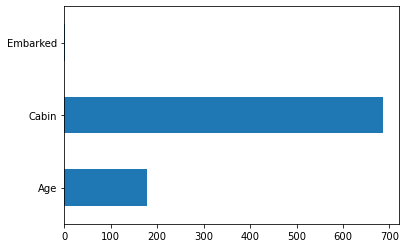

In [8]:
titanic.isnull().sum()[titanic.isnull().sum() != 0].plot.barh()

In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

####  2. Which column has the most `NaN` values? How many cells in that column are empty?


In [10]:
titanic.isnull().sum().sort_values(ascending=False).head(1)

Cabin    687
dtype: int64

In [11]:
titanic.isnull().sum().max()

687

In [12]:
titanic.isnull().sum().nlargest(1)

Cabin    687
dtype: int64

####  3. Delete all rows where `Embarked` is empty

In [13]:
titanic.dropna(subset=['Embarked'],inplace=True)

In [14]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### 4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [15]:
titanic['Cabin'].fillna(' ¯\(ツ)/¯',inplace=True)

In [16]:
titanic.fillna(' ¯\(ツ)/¯').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,¯\(ツ)/¯,S


In [17]:
titanic.isnull().mean().mul(100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.910011
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin           0.000000
Embarked        0.000000
dtype: float64

## Step 3: Feature extraction

#### 1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [18]:
titanic['FamilyCount'] = titanic['SibSp']+titanic['Parch']

In [19]:
titanic['FamilyCount']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: FamilyCount, Length: 889, dtype: int64

In [20]:
titanic[['SibSp','Parch','FamilyCount']]

,SibSp,Parch,FamilyCount
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0
...,...,...,...
886,0,0,0
887,0,0,0
888,1,2,3
889,0,0,0


#### 2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.


In [21]:
titanic['IsReverend']=titanic['Name'].str.contains('Rev', case=True, regex=True)

In [22]:
titanic['IsReverend']=titanic['Name'].str.contains('Rev').astype(int)

In [23]:
titanic['IsReverend']=titanic['Name'].apply(lambda x:1 if 'Rev' in x else 0)

In [24]:
titanic['IsReverend'].value_counts()

0    883
1      6
Name: IsReverend, dtype: int64

#### 3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using...
`pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [25]:
titanic=pd.get_dummies(titanic,columns=['Embarked'])

In [26]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'FamilyCount', 'IsReverend',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1


## Step 4: Exploratory analysis

_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

#### 1. What was the survival rate overall?


In [28]:
titanic.groupby('Pclass')['Survived'].sum()

Pclass
1    134
2     87
3    119
Name: Survived, dtype: int64

In [29]:
round(titanic['Survived'].mean(),2)

0.38

In [30]:
print(str(round(titanic['Survived'].mean()*100,2))+'%')

38.25%


#### 2. Which gender fared the worst? What was their survival rate?

In [31]:
round(titanic.groupby('Sex')[['Survived']].mean()*100,2)

,Survived
Sex,
female,74.04
male,18.89


In [32]:
titanic.groupby('Sex')[['Survived']].mean().mul(100).round(2)

,Survived
Sex,
female,74.04
male,18.89


#### 3. What was the survival rate for each `Pclass`?

In [33]:
titanic.groupby('Pclass')[['Survived']].mean().mul(100).round(2)

,Survived
Pclass,
1,62.62
2,47.28
3,24.24


In [34]:
titanic.groupby(['Pclass','Sex'])[['Survived']].mean().mul(100).round(2)

Survived
Pclass Sex             
1      female     96.74
       male       36.89
2      female     92.11
       male       15.74
3      female     50.00
       male       13.54

#### 4. Did any reverends survive? How many?`

In [35]:
titanic[titanic['IsReverend']==1][['Name','Survived']]

,Name,Survived
149,"Byles, Rev. Thomas Roussel Davids",0
150,"Bateman, Rev. Robert James",0
249,"Carter, Rev. Ernest Courtenay",0
626,"Kirkland, Rev. Charles Leonard",0
848,"Harper, Rev. John",0
886,"Montvila, Rev. Juozas",0


#### 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [36]:
titanic['Cabin'].value_counts()

 ¯\(ツ)/¯       687
G6               4
C23 C25 C27      4
B96 B98          4
D                3
              ... 
B38              1
A14              1
D50              1
E10              1
D46              1
Name: Cabin, Length: 147, dtype: int64

In [37]:
titanic[titanic['Cabin']==' ¯\(ツ)/¯'][['Cabin','Survived']].mean().mul(100).round(2)

Survived    29.99
dtype: float64

#### 6. What is the survival rate for people whose `Age` is empty?

In [38]:
titanic[titanic['Age'].isnull()][['Age','Survived']].mean().mul(100).round(2)

Age           NaN
Survived    29.38
dtype: float64

In [39]:
len(titanic)

889

In [40]:
len(titanic[titanic['Age'].isnull()])

177

####  7. What is the survival rate for each port of embarkation?

In [41]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'FamilyCount', 'IsReverend',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [42]:
for col in [ 'Embarked_C', 'Embarked_Q', 'Embarked_S']:
    print(f"{col}:")
    print(titanic[titanic[col]==1]
    print()

SyntaxError: invalid syntax (<ipython-input-42-c48afc4b5dd7>, line 4)

In [43]:
titanic.groupby(['Embarked'])[['Survived']].mean().mul(100).round(2)

KeyError: 'Embarked'

#### 8. What is the survival rate for children (under 12) in each `Pclass`?

In [44]:
titanic[titanic['Age']<12].groupby(['Pclass','Age'])[['Survived']].mean().mul(100).round(2)

Survived
Pclass Age            
1      0.92     100.00
       2.00       0.00
       4.00     100.00
       11.00    100.00
2      0.67     100.00
       0.83     100.00
       1.00     100.00
       2.00     100.00
       3.00     100.00
       4.00     100.00
       5.00     100.00
       6.00     100.00
       7.00     100.00
       8.00     100.00
3      0.42     100.00
       0.75     100.00
       1.00      60.00
       2.00      14.29
       3.00      66.67
       4.00      57.14
       5.00     100.00
       6.00      50.00
       7.00       0.00
       8.00       0.00
       9.00      25.00
       10.00      0.00
       11.00      0.00

In [45]:
titanic[titanic['Age']<12].groupby(['Pclass'])[['Survived']].mean().mul(100).round(2)

,Survived
Pclass,
1,75.00
2,100.00
3,40.43


####  9. Did the captain of the ship survive? Is he on the list?

In [46]:
titanic[titanic['Name'].str.contains('Capt')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,2,0,0,0,1


In [47]:
titanic[titanic['Name'].str.contains('Smith')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,0,0,1,0,0
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,¯\(ツ)/¯,0,0,0,1,0
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,0,0,0,0,1
346,347,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,¯\(ツ)/¯,0,0,0,0,1


In [48]:
titanic[titanic['Name'].str.contains('Mr. James Clinch|Smith')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,0,0,1,0,0
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,¯\(ツ)/¯,0,0,0,1,0
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,0,0,0,0,1
346,347,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,¯\(ツ)/¯,0,0,0,0,1


#### 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [49]:
titanic[titanic['Survived'] == 0].groupby('Fare').max().tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
Fare,,,,,,,,,,,,,,,
247.5208,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,B58 B60,1,0,1,0,0
263.0000,439,0,1,"Fortune, Mr. Mark",male,64.0,3,4,19950,C23 C25 C27,5,0,0,0,1


In [50]:
titanic[titanic['Survived'] == 0].sort_values(by="Fare",ascending=False).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,5,0,0,0,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,5,0,0,0,1


#### 11. Does having family on the boat help or hurt your chances of survival?

In [51]:
titanic.groupby(['FamilyCount'])[['Survived']].mean().mul(100).round(2)

,Survived
FamilyCount,
0,30.09
1,55.28
2,57.84
3,72.41
4,20.00
5,13.64
6,33.33
7,0.00
10,0.00


In [52]:
titanic([titanic['FamilyCount']==0])['Survived'].mean().mul(100).round(2)

TypeError: 'DataFrame' object is not callable

In [ ]:
titanic['HasFamily']= titanic['FamilyCount'].apply(lambda x:x>0)
round(titanic.groupby(titanic['HasFamily'])[['Survived']].mean()*100,2)

## Step 5: Plotting
Using Matplotlib and Seaborn, create multiple charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


<AxesSubplot:xlabel='Pclass'>

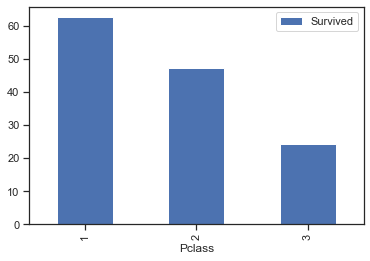

In [83]:
titanic.groupby('Pclass')[['Survived']].mean().mul(100).round(2).plot(kind='bar')

<AxesSubplot:xlabel='Pclass,Sex'>

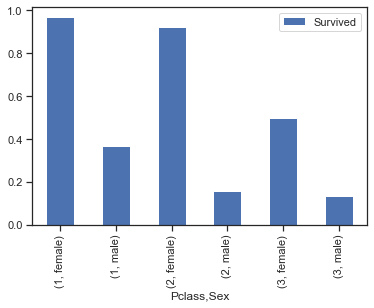

In [97]:
titanic.groupby(['Pclass','Sex'])[['Survived']].mean().plot(kind='bar')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

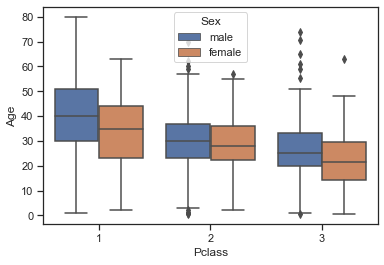

In [99]:
sns.boxplot(x ='Pclass',y ='Age',data = titanic,hue = 'Sex')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

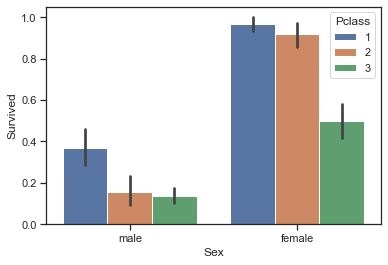

In [101]:
sns.barplot(x='Sex',y='Survived',data=titanic,hue='Pclass')

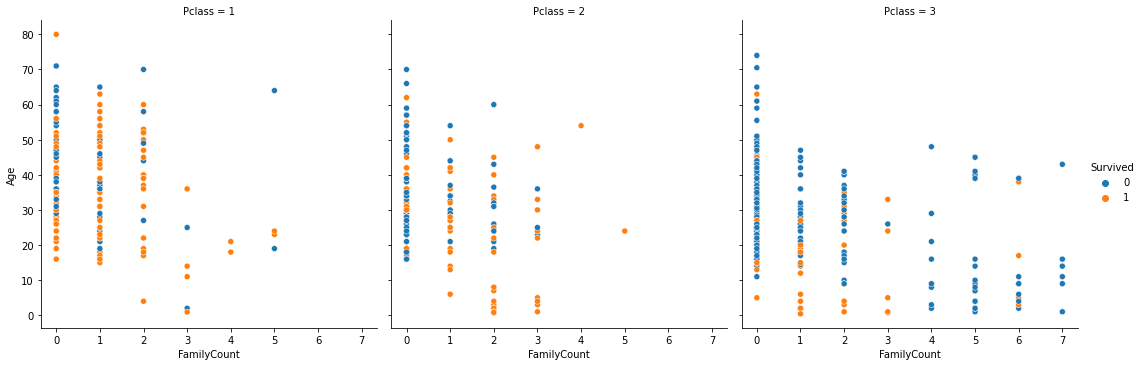

In [76]:
sns.relplot(data=titanic, x='FamilyCount', y='Age', hue='Survived', col='Pclass')

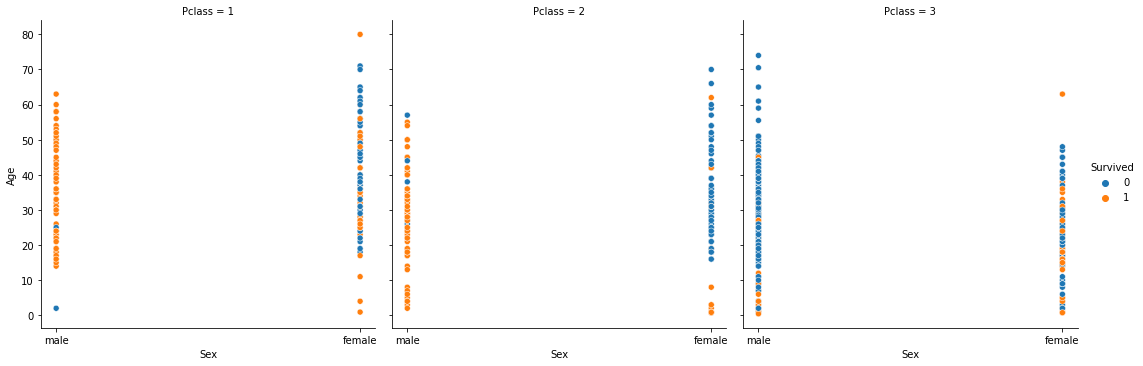

In [77]:
sns.relplot(data=titanic, x='Sex', y='Age', hue='Survived', col='Pclass')